In [1]:
print('hello')

hello


In [1]:
import pandas as pd


df = pd.read_csv(r"D:\Live.csv")


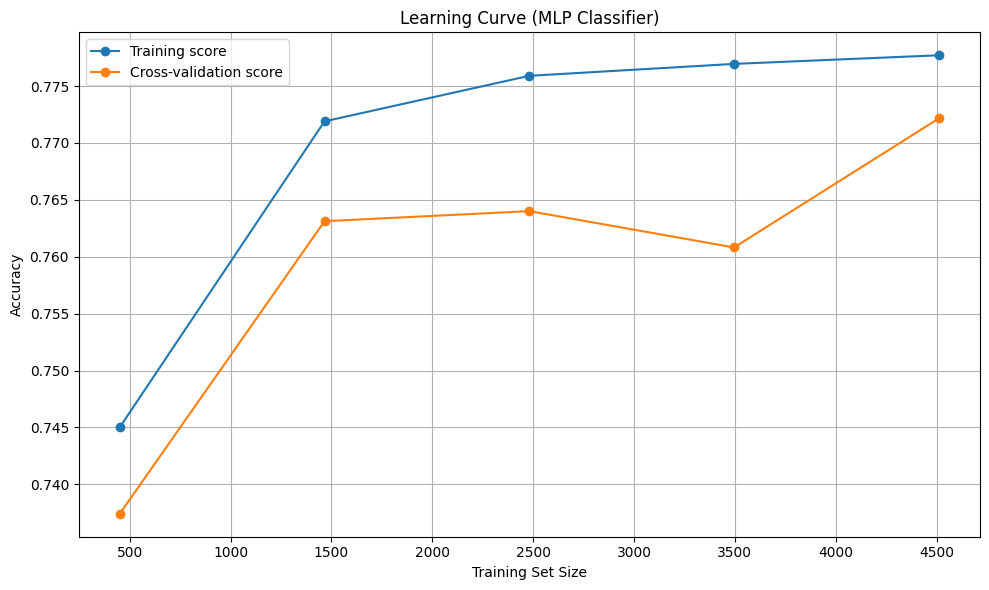

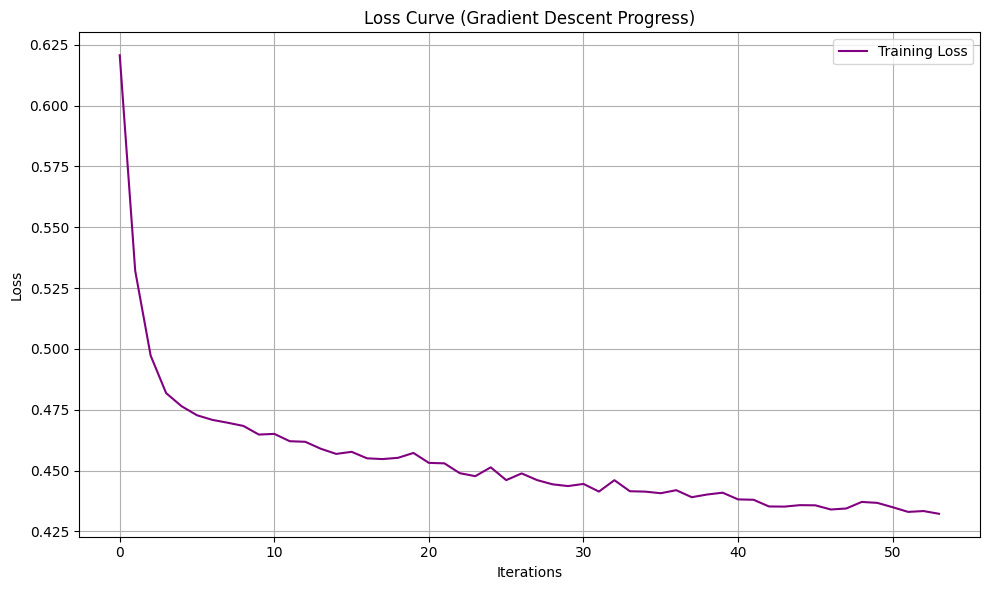

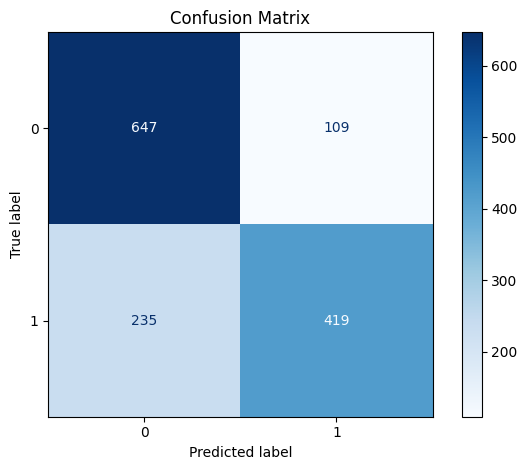

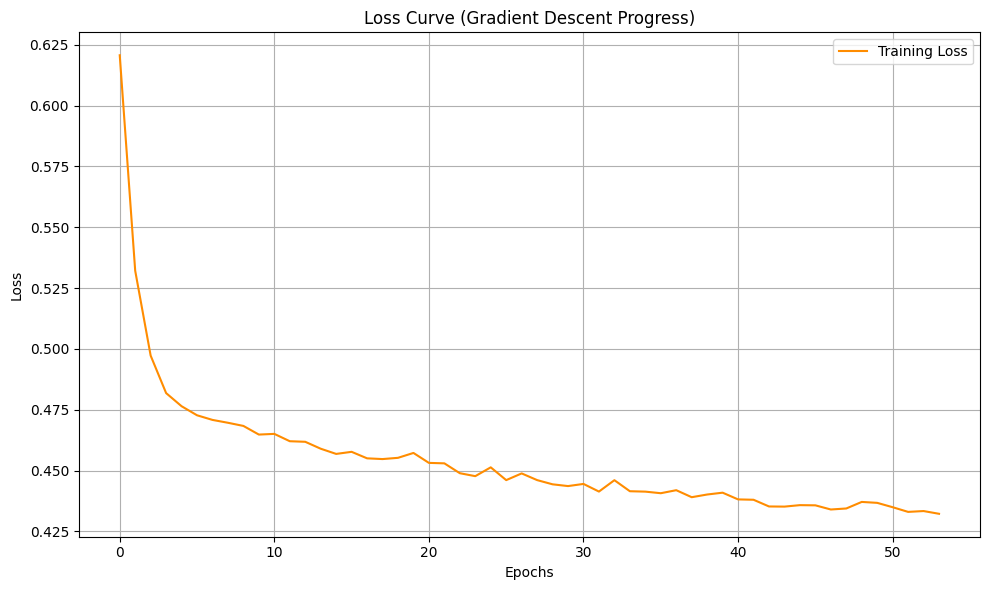

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Drop unnecessary columns
df_cleaned = df.drop(columns=["status_id", "status_published", "Column1", "Column2", "Column3", "Column4"])

# Convert categorical column to numeric
df_cleaned['status_type'] = LabelEncoder().fit_transform(df_cleaned['status_type'])

# Create binary target variable based on median of num_shares
median_shares = df_cleaned['num_shares'].median()
df_cleaned['target'] = (df_cleaned['num_shares'] > median_shares).astype(int)
df_cleaned = df_cleaned.drop(columns=['num_shares'])  # Drop original target column

# Split features and target
X = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),  # 3 hidden layers
    max_iter=500,
    alpha=0.0001,                      # L2 regularization (controls overfitting)
    learning_rate='adaptive',         # adapts learning rate during training
    solver='adam',                    # uses stochastic gradient descent with momentum
    early_stopping=True,              # stops training when validation score stops improving
    random_state=42
)
mlp.fit(X_train, y_train)
mlp.fit(X_train, y_train)
    
# Predict and calculate accuracy
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


from sklearn.model_selection import learning_curve

# Calculate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=mlp,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    random_state=42
)

# Calculate mean accuracy across folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (MLP Classifier)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label="Training Loss", color='purple')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve (Gradient Descent Progress)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay

y_pred = mlp.predict(X_test)
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


